<a href="https://colab.research.google.com/github/saratkv/HandsOn_Unsupervised_Learning_with_Python/blob/master/chapter03/absenteeism_at_work_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Download from: https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data
# Change <data_folder> with the actual path
#%mkdir /content/data
#%cd /content/data
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00445/Absenteeism_at_work_AAA.zip
#!unzip Absenteeism_at_work_AAA.zip
#!head /content/data/Absenteeism_at_work.csv

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.metrics.pairwise import pairwise_distances

# For reproducibility
np.random.seed(1000)

# Download the dataset from https://archive.ics.uci.edu/ml/machine-learning-databases/00445/
# unzip and set the path to .csv file
data_path = '/content/data/Absenteeism_at_work.csv'

n_perturbed = 20
n_data = []

Reason for absence                 740
Month of absence                   740
Day of the week                    740
Seasons                            740
Transportation expense             740
Distance from Residence to Work    740
Service time                       740
Age                                740
Work load Average/day              740
Hit target                         740
Disciplinary failure               740
Education                          740
Son                                740
Social drinker                     740
Social smoker                      740
Pet                                740
Weight                             740
Height                             740
Body mass index                    740
Absenteeism time in hours          740
dtype: int64
Transportation expense             740
Distance from Residence to Work    740
Service time                       740
Age                                740
Work load Average/day              740
Hit target  

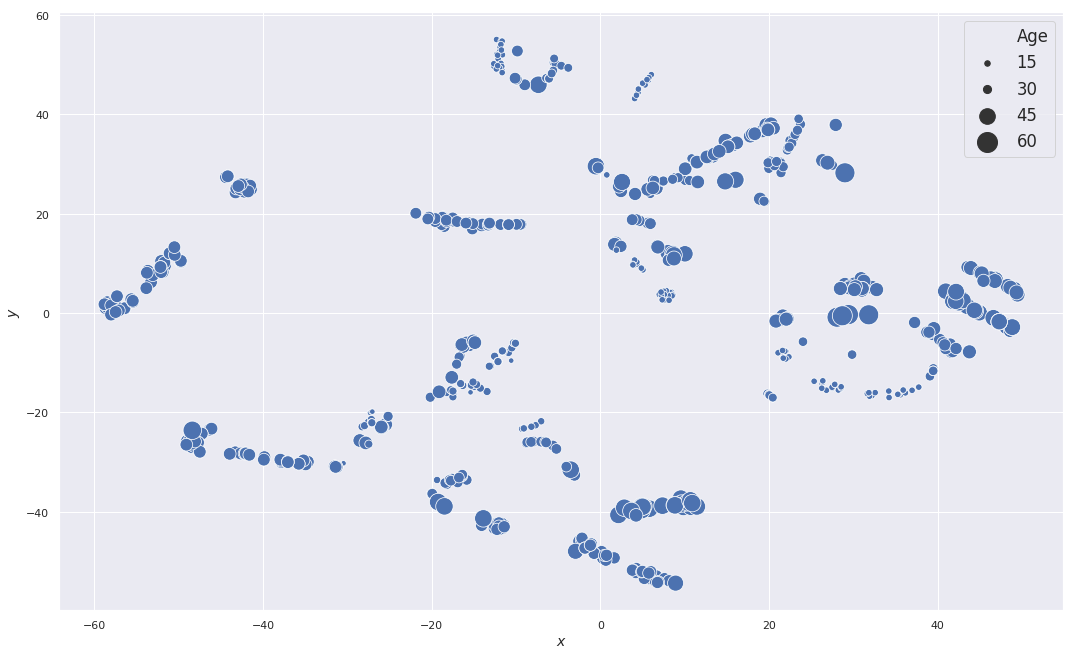

In [34]:
    # Load the dataset
    df = pd.read_csv(data_path, sep=';', header='infer', index_col=0).fillna(0.0)
    print(df.count())

    # Preprocess the dataset
    cdf = pd.get_dummies(df, columns=['Reason for absence', 'Month of absence', 'Day of the week',
                                     'Seasons', 'Disciplinary failure', 'Education',
                                     'Social drinker', 'Social smoker'])
    
    # cdf = df[['Reason for absence', 'Month of absence', 'Day of the week',
    #                                   'Seasons', 'Disciplinary failure', 'Education',
    #                                   'Social drinker', 'Social smoker'] ]
    
    # cdf = df.drop(labels=['Reason for absence', 'Month of absence', 'Day of the week',
    #                        'Seasons', 'Disciplinary failure', 'Education', 'Social drinker',
    #                        'Social smoker'], axis=1).astype(np.float64)

    print(cdf.count())
    print(cdf.head())

    # Standardize the dataset
    ss = StandardScaler(with_std=False)
    sdf = ss.fit_transform(cdf)

    # Perform the TSNE non-linear dimensionality reduction
    tsne = TSNE(n_components=2, perplexity=15, random_state=1000)
    data_tsne = tsne.fit_transform(sdf)

    df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'], index=cdf.index)
    dff = pd.concat([cdf, df_tsne], axis=1)

    # Show the dataset
    sns.set()

    fig, ax = plt.subplots(figsize=(18, 11))

    with sns.plotting_context("notebook", font_scale=1.5):
        sns.scatterplot(x='x',
                        y='y',
                        size='Age',
                        sizes=(30, 400),
                        palette=sns.color_palette("husl", 2),
                        data=dff,
                        ax=ax)

    ax.set_xlabel(r'$x$', fontsize=14)
    ax.set_ylabel(r'$y$', fontsize=14)

    plt.show()

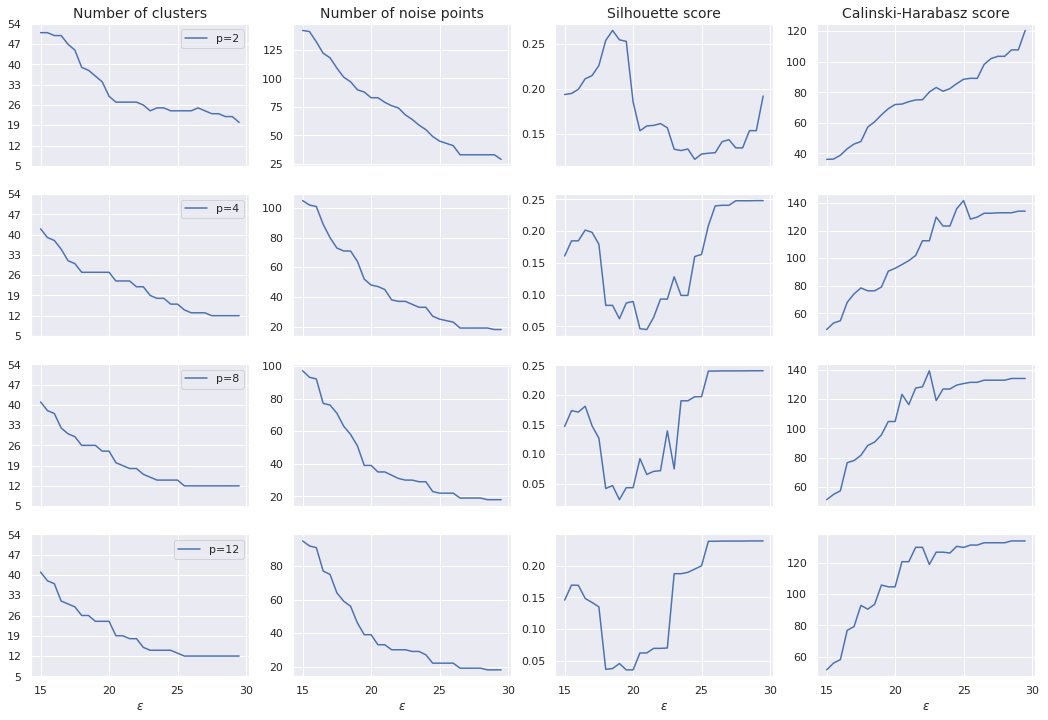

In [35]:
    # Perform the preliminary analysis
    n_clusters = []
    n_noise_points = []
    silhouette_scores = []
    calinski_harabaz_scores = []

    for p in [2, 4, 8, 12]:
        n_clusters_p = []
        n_noise_points_p = []
        silhouette_scores_p = []
        calinski_harabaz_scores_p = []

        for eps in np.arange(15, 30, 0.5):
            dst = DBSCAN(eps=eps, min_samples=3, metric='minkowski', p=p)
            Y_pred_t = dst.fit_predict(sdf)

            n_clusters_p.append(np.max(Y_pred_t) + 1)
            n_noise_points_p.append(np.sum(Y_pred_t == -1))
            silhouette_scores_p.append(silhouette_score(dff, Y_pred_t, metric='minkowski', p=p))
            calinski_harabaz_scores_p.append(calinski_harabasz_score(dff, Y_pred_t))

        n_clusters.append(n_clusters_p)
        n_noise_points.append(n_noise_points_p)
        silhouette_scores.append(silhouette_scores_p)
        calinski_harabaz_scores.append(calinski_harabaz_scores_p)

    # Show the results of the preliminary analysis
    fig, ax = plt.subplots(4, 4, figsize=(18, 12), sharex=True)

    for idx, p in enumerate([2, 4, 8, 12]):
        x = np.arange(15, 30, 0.5)

        ax[idx, 0].plot(x, n_clusters[idx], label='p={}'.format(p))
        ax[idx, 1].plot(x, n_noise_points[idx], label='p={}'.format(p))
        ax[idx, 2].plot(x, silhouette_scores[idx], label='p={}'.format(p))
        ax[idx, 3].plot(x, calinski_harabaz_scores[idx], label='p={}'.format(p))

    ax[0, 0].set_title('Number of clusters', fontsize=14)
    ax[0, 1].set_title('Number of noise points', fontsize=14)
    ax[0, 2].set_title('Silhouette score', fontsize=14)
    ax[0, 3].set_title('Calinski-Harabasz score', fontsize=14)

    for i in range(4):
        ax[i, 0].set_yticks(np.arange(5, 60, 7))
        ax[i, 0].legend()
        ax[3, i].set_xlabel(r'$\epsilon$')

    plt.show()


Number of clusters: 13
Number of noise points: 22


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in 

Silhouette score: 0.200
Calinski-Harabaz score: 129.860


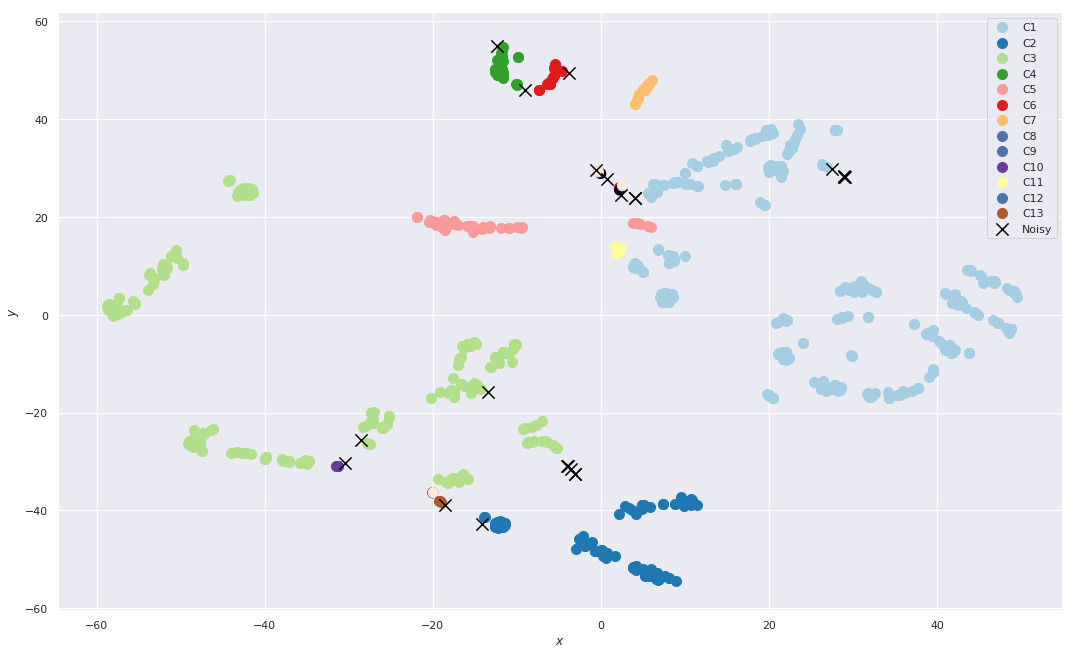

In [36]:
# Perform the clustering
    ds = DBSCAN(eps=25, min_samples=3, metric='minkowski', p=12)
    Y_pred = ds.fit_predict(sdf)

    print('Number of clusters: {}'.format(np.max(Y_pred) + 1))
    print('Number of noise points: {}'.format(np.sum(Y_pred == -1)))

    print('Silhouette score: {:.3f}'.format(silhouette_score(dff, Y_pred, metric='minkowski', p=12)))
    print('Calinski-Harabaz score: {:.3f}'.format(calinski_harabaz_score(dff, Y_pred)))

    # Show the clustering results
    fig, ax = plt.subplots(figsize=(18, 11))

    for i in range(np.max(np.unique(Y_pred)) + 1):
        ax.scatter(data_tsne[Y_pred == i, 0], data_tsne[Y_pred == i, 1], s=100, c=cm.Paired(i),
                   label='C{}'.format(i + 1))

    ax.scatter(data_tsne[Y_pred == -1, 0], data_tsne[Y_pred == -1, 1], marker='x', c='black', s=150, label='Noisy')

    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.legend()

    plt.show()
    

       Transportation expense  ...      Height
count                    67.0  ...   67.000000
mean                    179.0  ...  170.074627
std                       0.0  ...    0.610847
min                     179.0  ...  170.000000
25%                     179.0  ...  170.000000
50%                     179.0  ...  170.000000
75%                     179.0  ...  170.000000
max                     179.0  ...  175.000000

[8 rows x 10 columns]
       Transportation expense  ...      Height
count              162.000000  ...  162.000000
mean               234.604938  ...  169.839506
std                  8.597528  ...    3.962422
min                225.000000  ...  163.000000
25%                225.000000  ...  167.000000
50%                235.000000  ...  169.000000
75%                246.000000  ...  172.000000
max                248.000000  ...  182.000000

[8 rows x 10 columns]


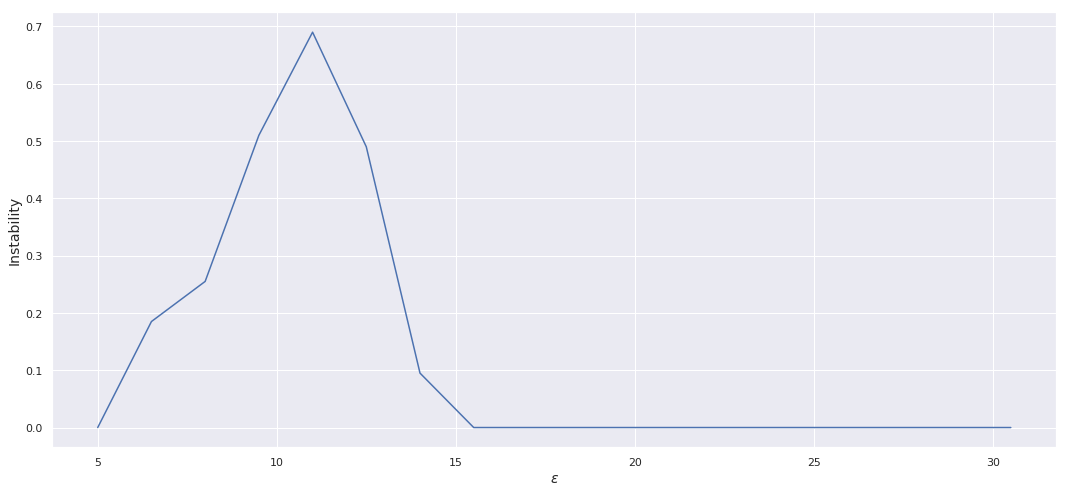

In [37]:
    # Describe the region x < -45
    sdff = dff[(dff.x < -45.0)]
    print(sdff[sdff.columns[0:10]].describe())

    # Describe the region x > 20 and -20 < y < 20
    sdff = dff[(dff.x > 20.0) & (dff.y > -20.0) & (dff.y < 20.0)]
    print(sdff[sdff.columns[0:10]].describe())

    # Perform the instability analysis
    data = sdf.copy()

    data_mean = np.mean(data, axis=0)
    data_cov = np.cov(data.T) / 4.0

    for i in range(n_perturbed):
        gaussian_noise = np.random.multivariate_normal(data_mean, data_cov, size=(data.shape[0],))
        noise = gaussian_noise * np.random.uniform(0.0, 1.0, size=(data.shape[0], data.shape[1]))
        n_data.append(data.copy() + noise)

    instabilities = []

    for eps in np.arange(5.0, 31.0, 1.5):
        Yn = []

        for nd in n_data:
            ds = DBSCAN(eps=eps, min_samples=3, metric='minkowski', p=12)
            Yn.append(ds.fit_predict(nd))

        distances = []

        for i in range(len(Yn) - 1):
            for j in range(i, len(Yn)):
                d = pairwise_distances(Yn[i].reshape(-1, 1), Yn[j].reshape(-1, 1), 'hamming')
                distances.append(d[0, 0])

        instability = (2.0 * np.sum(distances)) / float(n_perturbed ** 2)
        instabilities.append(instability)

    # Show the results
    fig, ax = plt.subplots(figsize=(18, 8))

    ax.plot(np.arange(5.0, 31.0, 1.5), instabilities)
    ax.set_xlabel(r'$\epsilon$', fontsize=14)
    ax.set_ylabel('Instability', fontsize=14)

    plt.show()